In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [20]:
df1 = pd.read_csv("data/premier_league.csv")
df2 = pd.read_csv('data/F1.csv')
df3 = pd.read_csv('data/D1.csv')
df4= pd.read_csv('data/I1.csv')
df = pd.DataFrame()
df= df.append([df1,df2,df3,df4])
list_league = np.array(['E0','F1','D1','I1'])

In [21]:
def prediction (odds1,odds2,odds3):
    if odds1<odds3 and odds1<odds2:
        predict = 0
    elif odds3<odds1 and odds3<odds2:
        predict = 1
    elif odds2< odds1 and odds2<odds3:
        predict=2
    else:
        predict=3
    return predict
def win_draw_loose(result):
    if result == 'H':
        points = 3
    elif result == 'D':
        points = 1
    elif result == 'A':
        points =0
    return points

def bookeh_right(result,prediction):
    if result == 3 and prediction == 0:
        is_right = True
    elif result == 0 and prediction == 1:
        is_right = True
    elif result == 1 and prediction ==2:
        is_right = True
    else:
        is_right = False
    return is_right
list_bookeh = np.array(['B365','BW','IW','PS','VC','WH'])
df['points'] = df['FTR'].apply(win_draw_loose)

for i in range(len(list_bookeh)):
    y = list_bookeh[i]
    df[y+'pred'] = df.apply(lambda x: prediction(x[y+'H'], x[y+'D'],x[y+'A']), axis=1)
    df[y+'right'] = df.apply(lambda x: bookeh_right(x['points'],x[y+'pred']),axis=1)
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,BWpred,BWright,IWpred,IWright,PSpred,PSright,VCpred,VCright,WHpred,WHright
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,0,True,0,True,0,True,0,True,0,True
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,1,True,1,True,1,True,1,True,1,True
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,0,False,0,False,0,False,0,False,0,False
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,0,True,0,True,0,True,0,True,0,True
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1,False,1,False,1,False,1,False,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,I1,08/03/2020,14:00,Milan,Genoa,1,2,A,0,2,...,0,False,0,False,0,False,0,False,0,False
252,I1,08/03/2020,14:00,Sampdoria,Verona,2,1,H,0,1,...,0,True,0,True,0,True,0,True,0,True
253,I1,08/03/2020,17:00,Udinese,Fiorentina,0,0,D,0,0,...,1,False,1,False,1,False,1,False,1,False
254,I1,08/03/2020,19:45,Juventus,Inter,2,0,H,0,0,...,0,True,0,True,0,True,0,True,0,True


In [22]:
df.groupby(['Div','HomeTeam']).sum().sort_values(by=['Div','points'],ascending=False)['points']

Div  HomeTeam          
I1   Juventus              37
     Lazio                 36
     Inter                 25
     Roma                  21
     Verona                21
                           ..
D1   Mainz                 14
     Fortuna Dusseldorf    12
     Hertha                12
     Paderborn              7
     Werder Bremen          5
Name: points, Length: 78, dtype: int64

In [23]:
prediction_df = pd.DataFrame(columns=['Div','bookeh','true','false'])
for j in range(len(list_league)):
    temp_df = df[df['Div']== list_league[j]]
    true = np.array([])
    false = np.array([])
    for i in range(len(list_bookeh)):
        y = list_bookeh[i]
        true = np.append(true,temp_df[y+'right'].value_counts()[0])
        false = np.append(false,temp_df[y+'right'].value_counts()[1])
    d = {'Div':[list_league[j]]*len(list_bookeh),'bookeh':list_bookeh,'true': true,'false':false}
    temp = pd.DataFrame(data = d)
    temp['precision']= temp.true/(temp.true + temp.false)
    prediction_df =prediction_df.append(temp)  
prediction_df.sort_values(by=['precision','Div'],ascending=False)

,Div,bookeh,true,false,precision
0,D1,B365,111.0,113.0,0.495536
2,D1,IW,110.0,114.0,0.491071
5,D1,WH,110.0,114.0,0.491071
1,D1,BW,109.0,115.0,0.486607
3,D1,PS,109.0,115.0,0.486607
4,D1,VC,109.0,115.0,0.486607
2,F1,IW,134.0,145.0,0.480287
5,F1,WH,134.0,145.0,0.480287
3,E0,PS,138.0,150.0,0.479167
1,F1,BW,133.0,146.0,0.476703


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


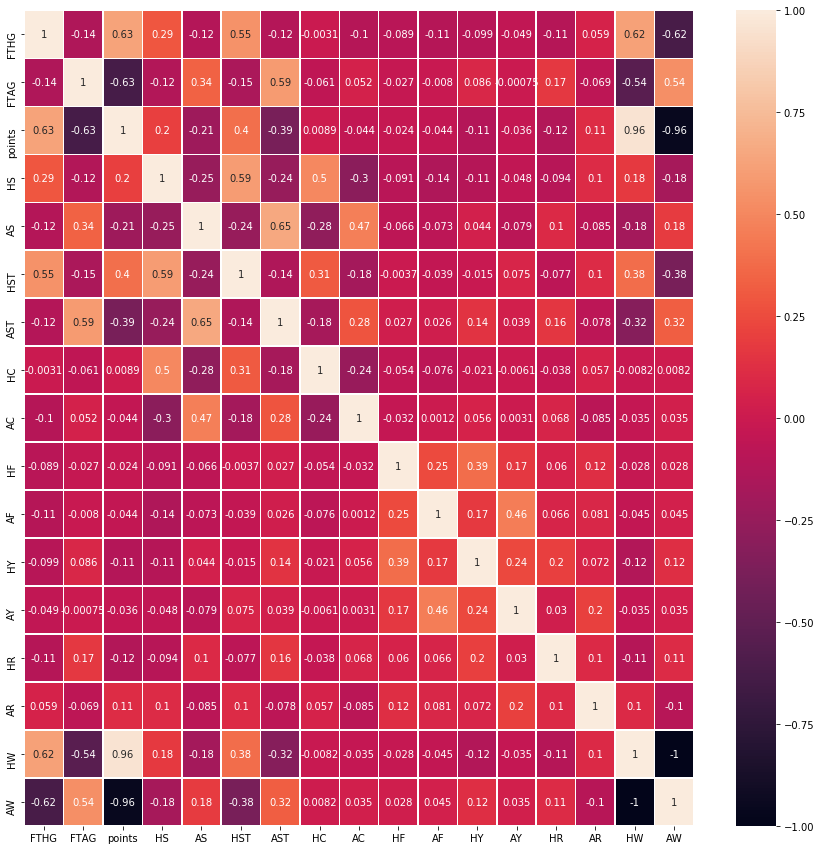

In [24]:
column_corr =['FTHG','FTAG','points','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']
df_corr = df[column_corr]
df_corr['HW']=df_corr['points'].apply(lambda x: 1 if x ==3 else 0)
df_corr['AW']=df_corr['points'].apply(lambda x: 0 if x ==3 else 1)
df_corr = df_corr.corr()
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(df_corr, annot=True, linewidths=.5, ax=ax)

In [16]:
df['Win']= df['FTR'].apply(lambda x: 1 if x=='H' else 0)

In [17]:
win_df = df.groupby(['Div','HomeTeam']).sum().sort_values(by=['Div','points'],ascending=False)['Win']